# <font color = "darkred">TERCERA EVALUACIÓN - II TÉRMINO 2016-2017/ Marzo 7, 2017</font>

## <font color ="darkblue">TEMA 1 </font>

<img src="tema1.png">

<img src="tema1Literal1.png">

In [1]:
def obtenerClientes(nombreArchivo):
    archivo = open(nombreArchivo)
    clientes = {}
    for linea in archivo:
        cedula, numero, sector, minutos, estado = linea.strip().split(",")
        nacionales,internacionales = minutos.split("|")
        if cedula not in clientes:
            clientes[cedula] ={}
        clientes[cedula][numero] = {"sector": sector, "estado": estado, "nac": int(nacionales), "inter": int(internacionales)}
    archivo.close()
    return clientes

In [2]:
dclientes = obtenerClientes("Clientes.csv")

In [3]:
 dclientes

{'1174253723': {'04-283497': {'estado': 'Activo',
   'inter': 27,
   'nac': 15,
   'sector': 'Norte'},
  '04-324426': {'estado': 'Cortado', 'inter': 9, 'nac': 0, 'sector': 'Norte'},
  '04-430419': {'estado': 'Cortado',
   'inter': 30,
   'nac': 30,
   'sector': 'Oeste'}},
 '1278112648': {'04-383056': {'estado': 'Activo',
   'inter': 15,
   'nac': 50,
   'sector': 'Sur'},
  '04-443288': {'estado': 'Activo',
   'inter': 30,
   'nac': 12,
   'sector': 'Norte'}},
 '1302511926': {'04-325363': {'estado': 'Activo',
   'inter': 12,
   'nac': 90,
   'sector': 'Este'}},
 '1729478396': {'04-437289': {'estado': 'Activo',
   'inter': 2,
   'nac': 4,
   'sector': 'Centro'}},
 '2061722895': {'04-356539': {'estado': 'Cortado',
   'inter': 40,
   'nac': 17,
   'sector': 'Norte'}}}

<img src="tema1Literal2.png">

In [6]:
def calcularTarifaInt(minutos):
    if minutos < 60:
        return minutos * 0.05
    if minutos < 90:
        return minutos * 0.04
    return minutos * 0.03

def generarFactura(dclientes):
    for cliente, telefonos in dclientes.items():
        lineas = ["Empresa Telefonica de Guayaquil"]
        lineas.append("Cliente: " + cliente)
        lineas.append("Detalle Deuda:")
        total = 0
        for telefono, valores in dclientes[cliente].items():
            nacional = valores["nac"] * 0.03
            internacional = calcularTarifaInt(valores["inter"])
            total += nacional + internacional
            linea = telefono + "nac: " + str(nacional) + " inter: " + str(internacional) + " total: " + str(nacional + internacional)
            lineas.append(linea)
        lineas.append("Total a Pagar: " + str(total))
        archivo = open(cliente +".txt", "w")
        archivo.write("\n".join(lineas))
        archivo.close()
        

In [7]:
generarFactura(dclientes)
"Generado"

'Generado'

<img src = "tema1Literal3.png">

In [8]:
def estadisticaSector(dclientes,sector):
    dic = {"Nacionales": [], "Internacionales": []}
    
    for telefonos in dclientes.values():
        for info in telefonos.values():
            if info["sector"] == sector and info["estado"] == "Activo":
                dic["Nacionales"].append(info["nac"])
                dic["Internacionales"].append(info["inter"])
    dic["Nacionales"] = float(sum(dic["Nacionales"]))/ len(dic["Nacionales"])
    dic["Internacionales"] = float(sum(dic["Internacionales"]))/ len(dic["Internacionales"])
    return dic

In [9]:
estadisticaSector(dclientes,"Norte")

{'Internacionales': 28.5, 'Nacionales': 13.5}

## <font color ="darkblue">TEMA 2 </font>

<img src = "tema2F.png">

In [21]:
import numpy as np
JRV_H = np.random.randint(1,100, (20,5))
JRV_M = np.random.randint(1,100, (20,5))

<img src = "tema2Literal1.png">

In [22]:
def contarVotos(JRV_H,JRV_M):
    votosH = JRV_H.sum(axis = 0)
    votosM = JRV_M.sum(axis = 0)
    votosT = votosH + votosM
    return tuple(votosT)

In [23]:
contarVotos(JRV_H,JRV_M)

(2429, 1892, 1549, 2254, 1874)

<img src ="tema2Literal2.png">

In [35]:
def SegundaVuelta(JRV_H,JRV_M):
    totalV = JRV_H.sum() + JRV_M.sum()
    votosC = list(contarVotos(JRV_H,JRV_M))
    votosC.sort()
    votosC = votosC[::-1]
    ganador,segundo = votosC[:2]
    porcentajeGanador = float(ganador*100)/totalV
    porcentajeSegundo = float(segundo*100)/totalV
    return not( (porcentajeGanador > 40) and (porcentajeGanador - porcentajeSegundo) >= 10)

In [36]:
SegundaVuelta(JRV_H,JRV_M)

True

<img src = "tema2Literal3.png">

In [37]:
def estadistica(JRV_H, JRV_M, candidatos, nombreCandidato):
    votosH = JRV_H.sum(axis = 0)
    votosM = JRV_M.sum(axis = 0)
    indice = candidatos.index(nombreCandidato)
    vH,vM = votosH[indice], votosM[indice]
    totalV = JRV_H.sum() + JRV_M.sum()
    pH,pM = float(vH*100)/totalV, float(vM*100)/totalV
    return pH+pM, float(vH*100)/(vH+vM), float(vM*100)/(vH+vM)

estadistica(JRV_H, JRV_M, ("c1", "c2", "c3", "c4", "c5"), "c3")

(30.00322788896062, 48.68208714362561, 51.31791285637439)

<img src = "tema2Literal4.png">

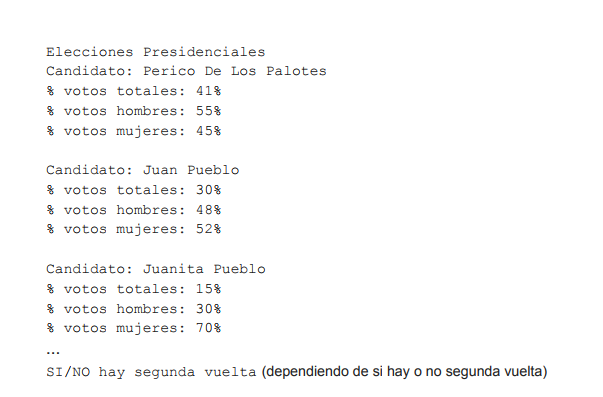

In [40]:
import numpy as np
JRV_H = np.random.randint(10,100, (20,3))
JRV_M = np.random.randint(10,100, (20,3))
candidatos = "Perico De los Palotes", "Alvaro Noboa", "Juanita Pueblo"
print "Elecciones Presidenciales"
for candidato in candidatos:
    print
    total, hombres, mujeres = estadistica(JRV_H, JRV_M, candidatos, candidato)
    print "Candidato: "+ candidato
    print "% votos totales: " +str(total) + "%"
    print "% votos hombres: " +str(hombres) + "%"
    print "% votos mujeres: " +str(mujeres) + "%"
    aux = ["NO", "SI"]
    segunda = SegundaVuelta(JRV_H,JRV_M)
    print
print aux[int(segunda)] + " hay segunda vuelta"

Elecciones Presidenciales

Candidato: Perico De los Palotes
% votos totales: 34.2585720647%
% votos hombres: 53.596187175%
% votos mujeres: 46.403812825%


Candidato: Alvaro Noboa
% votos totales: 33.2492207214%
% votos hombres: 51.6517857143%
% votos mujeres: 48.3482142857%


Candidato: Juanita Pueblo
% votos totales: 32.4922072139%
% votos hombres: 39.104613979%
% votos mujeres: 60.895386021%

SI hay segunda vuelta
